<a href="https://colab.research.google.com/github/kanjicool/forecast_pm_2_5/blob/main/2099_ConvLSTM1D_%2B_Bidirectional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [122]:
df = pd.read_csv("clean_pm25_data.csv", parse_dates=["timestamp"])

In [123]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00.000,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00.000,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00.000,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00.000,96.426316,23.070175,21.912281,28.028070


In [124]:
# ลบไมโครวินาทีออกจาก timestamp
df["timestamp"] = df["timestamp"].str.replace(r"\.\d{3,}", "", regex=True)

In [125]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


In [126]:
print(df.dtypes)

timestamp       object
humidity       float64
pm_10          float64
pm_2_5         float64
temperature    float64
dtype: object


In [127]:
print(df.columns)

Index(['timestamp', 'humidity', 'pm_10', 'pm_2_5', 'temperature'], dtype='object')


In [128]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
print(df.dtypes)

timestamp      datetime64[ns]
humidity              float64
pm_10                 float64
pm_2_5                float64
temperature           float64
dtype: object


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672752 entries, 0 to 672751
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   timestamp    672752 non-null  datetime64[ns]
 1   humidity     672752 non-null  float64       
 2   pm_10        672752 non-null  float64       
 3   pm_2_5       672752 non-null  float64       
 4   temperature  672752 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 25.7 MB


In [130]:
print(df.dtypes)

timestamp      datetime64[ns]
humidity              float64
pm_10                 float64
pm_2_5                float64
temperature           float64
dtype: object


In [131]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


In [132]:
nat_row = df[df["timestamp"].isna()]
print(nat_row)

Empty DataFrame
Columns: [timestamp, humidity, pm_10, pm_2_5, temperature]
Index: []


In [133]:
print(f"Missing timestamp: {df['timestamp'].isna().mean() * 100:.2f}%")


Missing timestamp: 0.00%


In [134]:
df

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-08-16 07:00:00,97.712066,6.419446,5.979462,24.220945
1,2021-08-17 07:00:00,95.922874,9.716751,9.142292,24.807743
2,2021-08-18 07:00:00,87.291672,8.607477,7.901869,26.346601
3,2021-08-19 07:00:00,86.124131,11.832133,10.989553,27.062054
4,2021-08-20 07:00:00,89.532874,8.965864,8.201077,26.208938
...,...,...,...,...,...
672747,2025-02-11 08:00:00,99.900002,36.983333,32.583333,24.108333
672748,2025-02-11 09:00:00,99.900002,47.872727,39.872727,25.109091
672749,2025-02-11 10:00:00,99.832760,23.793103,22.327586,26.774138
672750,2025-02-11 11:00:00,96.426316,23.070175,21.912281,28.028070


 แปลงข้อมูลจากรายชั่วโมง → รายวัน (ใช้ค่าเฉลี่ย)

In [135]:
df.set_index("timestamp", inplace=True)  # ตั้ง timestamp เป็น index
df_daily = df.resample("D").mean()  # Resample รายวัน
df_daily.reset_index(inplace=True)  # รีเซ็ต index ถ้าต้องการคอลัมน์ timestamp กลับมา

print(df_daily.head())  # ตรวจสอบผลลัพธ์


   timestamp   humidity      pm_10     pm_2_5  temperature
0 2021-02-11  78.085506  17.296982  15.090510    29.147623
1 2021-02-12  83.773975  18.518441  16.375654    27.888929
2 2021-02-13  79.863308  24.047247  21.543936    27.849907
3 2021-02-14  79.903002  36.705885  31.860588    27.446633
4 2021-02-15  79.229596  38.337904  33.055341    27.470763


In [136]:
df_daily

,timestamp,humidity,pm_10,pm_2_5,temperature
0,2021-02-11,78.085506,17.296982,15.090510,29.147623
1,2021-02-12,83.773975,18.518441,16.375654,27.888929
2,2021-02-13,79.863308,24.047247,21.543936,27.849907
3,2021-02-14,79.903002,36.705885,31.860588,27.446633
4,2021-02-15,79.229596,38.337904,33.055341,27.470763
...,...,...,...,...,...
1457,2025-02-07,74.429496,24.319329,19.937410,28.912610
1458,2025-02-08,74.175832,25.215313,20.366785,29.052255
1459,2025-02-09,74.699870,25.545159,19.176782,28.887772
1460,2025-02-10,73.144507,24.671367,21.371354,29.258430


# Preprocessing data

In [137]:
# def remove_or_cap_outliers_median(df, column, threshold=3):
#     df_new = df.copy()
#     data = df_new[column]
#     median = data.median()
#     mean = data.mean()
#     std = data.std()
#     lower_bound = mean - threshold * std
#     upper_bound = mean + threshold * std

#     df_new[column] = df_new[column].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)
#     return df_new

# df_daily_clean = remove_or_cap_outliers_median(df_daily, 'pm_2_5')

In [138]:
from sklearn.preprocessing import MinMaxScaler

# ใช้ humidity pm_10 pm_2_5 และ temperature เป็น feature
features = ['humidity', 'pm_10', 'pm_2_5', 'temperature']
df_clean = df_daily[features].copy()


In [139]:
print(df_clean.isna().sum())

humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64


In [140]:
# df.interpolate(method='linear', inplace=True)

In [141]:
df_clean

,humidity,pm_10,pm_2_5,temperature
0,78.085506,17.296982,15.090510,29.147623
1,83.773975,18.518441,16.375654,27.888929
2,79.863308,24.047247,21.543936,27.849907
3,79.903002,36.705885,31.860588,27.446633
4,79.229596,38.337904,33.055341,27.470763
...,...,...,...,...
1457,74.429496,24.319329,19.937410,28.912610
1458,74.175832,25.215313,20.366785,29.052255
1459,74.699870,25.545159,19.176782,28.887772
1460,73.144507,24.671367,21.371354,29.258430


(array([ 17.,  71., 148., 169., 161., 140., 150., 115.,  78., 100.,  70.,
         48.,  37.,  30.,  21.,  10.,   3.,  10.,   6.,   8.,   6.,   6.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,  10.,  10.,   6.,
          0.,   4.,   1.,   2.,   5.,   7.,   3.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([  2.55272251,   4.65732739,   6.76193228,   8.86653716,
         10.97114204,  13.07574692,  15.1803518 ,  17.28495668,
         19.38956156,  21.49416644,  23.59877133,  25.70337621,
         27.80798109,  29.91258597,  32.01719085,  34.12179573,
         36.22640061,  38.33100549,  40.43561038,  42.54021526,
         44.64482014,  46.74942502,  48.8540299 ,  50.95863478,
         53.06323966,  55.16784454,  57.27244943,  59.37705431,
         61.48165919,  63.58626407,  65.69086895,  67.79

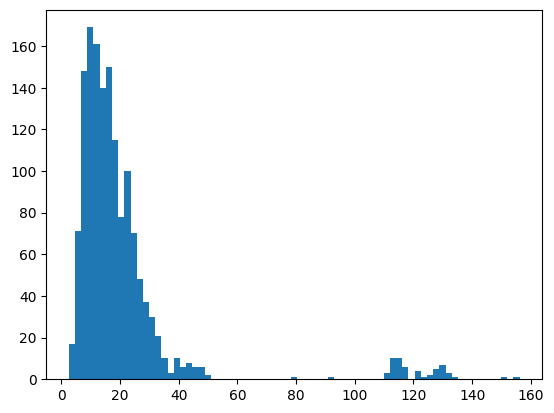

In [142]:
plt.hist(df_clean['pm_2_5'], bins='auto')

In [143]:
df_clean

,humidity,pm_10,pm_2_5,temperature
0,78.085506,17.296982,15.090510,29.147623
1,83.773975,18.518441,16.375654,27.888929
2,79.863308,24.047247,21.543936,27.849907
3,79.903002,36.705885,31.860588,27.446633
4,79.229596,38.337904,33.055341,27.470763
...,...,...,...,...
1457,74.429496,24.319329,19.937410,28.912610
1458,74.175832,25.215313,20.366785,29.052255
1459,74.699870,25.545159,19.176782,28.887772
1460,73.144507,24.671367,21.371354,29.258430


In [144]:
print(df_clean.isnull().sum())

humidity       0
pm_10          0
pm_2_5         0
temperature    0
dtype: int64


ควรแบ่งข้อมูลเป็นชุด train/test ก่อนพรีโพรเซส (เช่น 80:20) มิฉะนั้นอาจเกิด data leakage

In [145]:
# แบ่ง Train/Test (เช่น 70% train, 30% test)
train_size = int(len(df_clean) * 0.7)
val_size = int(len(df_clean) * 0.15)
train_data = df_clean.iloc[:train_size].values
val_data = df_clean.iloc[train_size:train_size + val_size].values
test_data = df_clean.iloc[train_size + val_size:].values

In [146]:
# ใช้ MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_data)
val_scaled = scaler.transform(val_data)
test_scaled = scaler.transform(test_data)

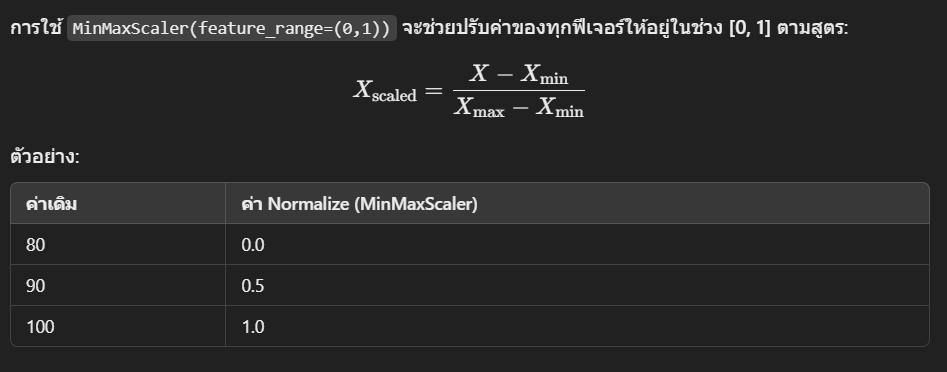

X(dataset) = [ 10, 11, 18, 15, 20]

# ฟังก์ชันสร้าง sequence

In [147]:
# def create_sequences(data, seq_length):
#   X, y = [], []
#   for i in range(len(data) - seq_length):
#     X.append(data[i:i+seq_length]) # input sequence
#     y.append(data[i+seq_length, 2]) # target column 2 = pm 2.5
#   return np.array(X), np.array(y)

# seq_length = 7
# X_train, y_train = create_sequences(train_scaled, seq_length)
# X_test, y_test = create_sequences(test_scaled, seq_length)

# print(f"Train Shape: X={X_train.shape}, y={y_train.shape}")
# print(f"Test Shape: X={X_test.shape}, y={y_test.shape}")

In [180]:
# สร้าง sequence ด้วย stride
def create_dataset_with_stride(time_series, W_in, W_out, S):
    X, y = [], []
    for i in range(0, len(time_series) - W_in - W_out + 1, S):
        X.append(time_series[i:i + W_in])
        y.append(time_series[i + W_in:i + W_in + W_out, 2])  # ใช้ column 2 (pm_2_5) เป็น target
    return np.array(X), np.array(y)

seq_length = 7  # W_in
W_out = 1
stride = 1  # S
X_train, y_train = create_dataset_with_stride(train_scaled, seq_length, W_out, stride)
X_val, y_val = create_dataset_with_stride(val_scaled, seq_length, W_out, stride)
X_test, y_test = create_dataset_with_stride(test_scaled, seq_length, W_out, stride)

# ปรับ shape ข้อมูลให้เหมาะกับ ConvLSTM1D
X_train = np.expand_dims(X_train, axis=1)  # (samples, 1, seq_length, features)
X_val = np.expand_dims(X_val, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# ตรวจสอบ shape
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1016, 1, 7, 4)
X_val shape: (212, 1, 7, 4)
X_test shape: (213, 1, 7, 4)


# ConvLSTM1D + Bidirectional LSTM

In [192]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, ConvLSTM1D, Bidirectional, LSTM, Dense, Dropout, BatchNormalization, TimeDistributed, Flatten

# สร้างโมเดล
input_shape = (1, seq_length, X_train.shape[3])  # เช่น (1, 7, 4)
inp = Input(shape=input_shape)

# ConvLSTM1D เพื่อจับ spatial-temporal patterns
x = ConvLSTM1D(
    filters=32,
    kernel_size=7,
    padding="same",
    return_sequences=True,
    activation="swish",
    dropout=0.2,
)(inp)
x = BatchNormalization(axis=3)(x)

# ปรับ shape ของ output จาก ConvLSTM1D ให้เป็น 3D (batch_size, timesteps, features)
# ใช้ TimeDistributed เพื่อ flatten rows และรวมกับ timesteps
x = TimeDistributed(Flatten())(x)  # Output shape: (None, 1, 7 * 32)

# Bidirectional LSTM เพื่อเรียนรู้ temporal patterns
x = Bidirectional(LSTM(
    units=1024,
    return_sequences=False,
    dropout=0.01,
))(x)
x = BatchNormalization()(x)

# Fully Connected Layer สำหรับการทำนายค่า PM2.5
x = Dense(1, activation='linear', kernel_regularizer=tf.keras.regularizers.l2(0.0005))(x)
# x = Dropout(0.05)(x)  # ทดลองเพิ่ม Dropout

output = x

model = Model(inp, output, name='Model-ConvLSTM1D-BiLSTM')

# Compile โมเดล
learning_rate = 0.0001  # ลด learning_rate จาก 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

# แสดงโครงสร้างของโมเดล
model.summary()

Model: "Model-ConvLSTM1D-BiLSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)          │ (None, 1, 7, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm1d_11 (ConvLSTM1D)          │ (None, 1, 7, 32)            │          32,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 1, 7, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_11                  │ (None, 1, 224)              │               0 │
│ (TimeDistributed)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_11 (Bidirectional)     │ (None, 2048)                │      10,231,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,274,561 (39.19 MB)

 Trainable params: 10,270,401 (39.18 MB)

 Non-trainable params: 4,160 (16.25 KB)

# ConvLSTM1D + Conv3D + Bidirectional LSTM

In [150]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, ConvLSTM1D, Conv3D, TimeDistributed, Flatten, Bidirectional, LSTM, Dense, BatchNormalization, Dropout, Reshape

# # สร้างโมเดล
# input_shape = (1, seq_length, X_train.shape[3])  # เช่น (1, 7, 4)
# inp = Input(shape=input_shape)

# x = ConvLSTM1D(
#     filters=32,
#     kernel_size=7,
#     padding="same",
#     return_sequences=True,
#     activation="swish",
#     dropout=0.3
# )(inp)
# x = BatchNormalization(axis=3)(x)

# x = ConvLSTM1D(
#     filters=128,
#     kernel_size=3,
#     padding="same",
#     return_sequences=True,
#     activation="swish",
#     dropout=0.3
# )(x)
# x = BatchNormalization(axis=3)(x)

# output_reshaped = Reshape((1, 1, seq_length, 128))(x)
# conv3d_output = Conv3D(
#     filters=32,
#     kernel_size=(3, 3, 3),
#     activation='swish',
#     padding='same'
# )(output_reshaped)
# x = Dropout(0.3)(conv3d_output)
# x = TimeDistributed(Flatten())(x)

# x = Bidirectional(LSTM(
#     units=64,
#     return_sequences=False
# ))(x)

# output = Dense(1, activation='linear')(x)

# model = Model(inp, output, name='Model-ConvLSTM1D-BiLSTM')

**Custom LSTM Cell**

In [151]:
# import tensorflow as tf
# from tensorflow.keras.layers import RNN, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.metrics import mean_squared_error
# from tensorflow.keras.regularizers import l2

# class CustomLSTMCell(tf.keras.layers.Layer):
#   def __init__(self, units, dropout_rate):
#     super(CustomLSTMCell, self).__init__()
#     self.units = units
#     self.dropout_rate = dropout_rate
#     self.state_size = [units, units]  # กำหนดขนาดของ state (h_t, C_t)

#   def build(self, input_shape):
#     input_dim = input_shape[-1]

#     # Regularization
#     reg = l2(0.001)

#     # สร้าง Weights และ Bias สำหรับแต่ละ Gate
#     self.W_f = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
#                                regularizer=reg, name="W_f")
#     self.b_f = self.add_weight(shape=(self.units,), initializer="zeros", name="b_f")

#     self.W_i = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
#                                regularizer=reg, name="W_i")
#     self.b_i = self.add_weight(shape=(self.units,), initializer="zeros", name="b_i")

#     self.W_C = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
#                                regularizer=reg, name="W_C")
#     self.b_C = self.add_weight(shape=(self.units,), initializer="zeros", name="b_C")

#     self.W_o = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform",
#                                regularizer=reg, name="W_o")
#     self.b_o = self.add_weight(shape=(self.units,), initializer="zeros", name="b_o")

#   def call(self, inputs, states, training=False):
#     h_prev, C_prev = states # รับค่า Hidden State และ Cell state ก่อนหน้า

#     # รวม inputs กับ h_prev
#     concat = tf.concat([inputs, h_prev], axis=1)

#     # Dropout สำหรับ input (เฉพาะตอน training)
#     if training:
#       concat = tf.nn.dropout(concat, rate=self.dropout_rate)

#     # คำนวณ Forget Gate (ควบคุมว่าควรลืมข้อมูลเก่าแค่ไหน)
#     f_t = tf.sigmoid(tf.matmul(concat, self.W_f) + self.b_f)

#     # คำนวณ Input Gate (ควบคุมว่าควรรับข้อมูลใหม่แค่ไหน)
#     i_t = tf.sigmoid(tf.matmul(concat, self.W_i) + self.b_i)

#     # คำนวณ Candidate Memory Cell (สร้างค่าที่จะเพิ่มเข้าไปใน Cell State)
#     C_tilde = tf.tanh(tf.matmul(concat, self.W_C) + self.b_C)

#     # คำนวณ Output Gate (ควบคุมว่าควรส่งค่าจาก Cell State ไปยัง Hidden State แค่ไหน)
#     o_t = tf.sigmoid(tf.matmul(concat, self.W_o) + self.b_o)

#     # อัปเดตค่า Cell State ใหม่ (C_t)
#     C_t = f_t * C_prev + (i_t * C_tilde)

#     # คำนวณ Hidden State ใหม่ (h_t)
#     h_t = o_t * tf.tanh(C_t)

#     return h_t, [h_t, C_t]




```
self.W_f = self.add_weight(shape=(input_dim + self.units, self.units), initializer="glorot_uniform", name="W_f")
```


อธิบายการกำหนดค่า weight

- input_dim = 8 (มี 8 features)
- self.units = 16 (มี 16 หน่วย LSTM)
ขนาดของ W_f จะเป็น (8 + 16, 16) = (24, 16)

- initializer="glorot_uniform" `กำหนดวิธีการสุ่มค่าเริ่มต้นของ Weight
"glorot_uniform" หรือ Xavier Initialization` เป็นเทคนิคที่ช่วยให้ weight ไม่เล็กหรือใหญ่เกินไป ทำให้โมเดลเรียนรู้ได้ดีขึ้น

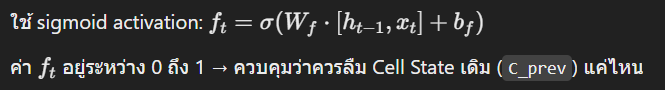

# สร้างและคอมไพล์โมเดล LSTM

In [152]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.regularizers import l2

# # โมเดลหลักใช้ Keras LSTM
# model = Sequential()

# # Layer 1: LSTM
# model.add(LSTM(128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2]),
#                dropout=0.3, kernel_regularizer=l2(0.001)))
# model.add(BatchNormalization())

# # Fully Connected Layer สำหรับการทำนายค่า PM2.5
# model.add(Dense(1, kernel_regularizer=l2(0.001)))
# model.add(Dropout(0.2))

# # ตั้งค่า Optimizer และ Loss Function
# learning_rate = 0.0001
# optimizer = Adam(learning_rate=learning_rate)

# model.compile(optimizer=optimizer, loss='mean_absolute_error')

# # แสดงโครงสร้างของโมเดล
# model.summary()


In [193]:
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6)
mcp = ModelCheckpoint('best_model.keras', save_best_only=True)

Callbacks ช่วยให้โมเดลเรียนรู้ได้ดีขึ้น

- EarlyStopping หยุดการเทรนเมื่อค่า loss ไม่ลดลง
- ReduceLROnPlateau ลดค่า learning rate หาก loss ไม่ลด

In [154]:
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# # หยุดการเทรนหาก val_loss ไม่ลดลงต่อเนื่อง 10 epochs
# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# # ลดค่า learning rate เมื่อ val_loss ไม่ลดลงต่อเนื่อง 5 epochs
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# callbacks = [early_stopping, reduce_lr]


การฝึกโมเดล (Training)

In [194]:
# ฝึกโมเดล
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr, mcp],
    verbose=1
)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.1820 - mae: 0.2466 - mse: 0.1810 - val_loss: 0.0212 - val_mae: 0.0595 - val_mse: 0.0202 - learning_rate: 1.0000e-04
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0229 - mae: 0.1030 - mse: 0.0219 - val_loss: 0.0203 - val_mae: 0.0582 - val_mse: 0.0193 - learning_rate: 1.0000e-04
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0170 - mae: 0.0866 - mse: 0.0160 - val_loss: 0.0203 - val_mae: 0.0579 - val_mse: 0.0194 - learning_rate: 1.0000e-04
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0318 - mae: 0.1173 - mse: 0.0309 - val_loss: 0.0205 - val_mae: 0.0582 - val_mse: 0.0195 - learning_rate: 1.0000e-04
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0176 - mae: 0.0809 - mse: 0.0166 - val_loss: 0.0203 - val_mae: 0.0577 - val_mse: 0.0193 - learning_rate: 5.0000e-05
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0113 - mae: 0.0739 - mse: 0.0103 - val_loss: 0.0

# การทำนายและประเมินผล

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Train MSE: 0.0033, RMSE: 0.0577, MAE: 0.0356, R²: 0.9000
Test MSE: 0.0020, RMSE: 0.0451, MAE: 0.0352, R²: 0.6464


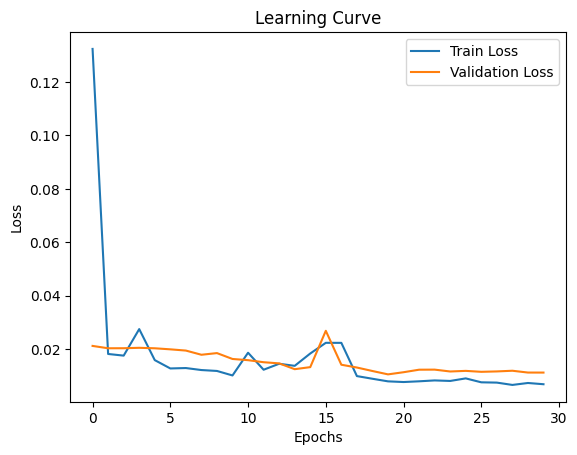

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ทำนายผล
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# คำนวณเมตริก
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# พล็อต Learning Curve
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Learning Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [157]:
# # ประเมินผล
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)
# train_rmse = np.sqrt(train_mse)
# test_rmse = np.sqrt(test_mse)
# train_mae = mean_absolute_error(y_train, y_train_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)
# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
# print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

# # Visualization
# plt.figure(figsize=(12, 6))
# plt.plot(y_test.flatten(), color='blue', label='Actual')
# plt.plot(y_test_pred.flatten(), color='orange', label='Predicted')
# plt.legend()
# plt.title("PM2.5 Prediction")
# plt.xlabel("Sample")
# plt.ylabel("PM2.5 Value (Scaled)")
# plt.show()

In [158]:
# y_pred = model.predict(X_test)


In [159]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10,5))
# plt.plot(y_test, label="Actual PM2.5", color="blue")
# plt.plot(y_pred, label="Predicted PM2.5", color="red", linestyle="dashed")
# plt.xlabel("Time Step")
# plt.ylabel("PM2.5 Value")
# plt.title("Actual vs Predicted PM2.5")
# plt.legend()
# plt.show()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
y_test shape: (213, 1)
y_pred shape: (213, 1)


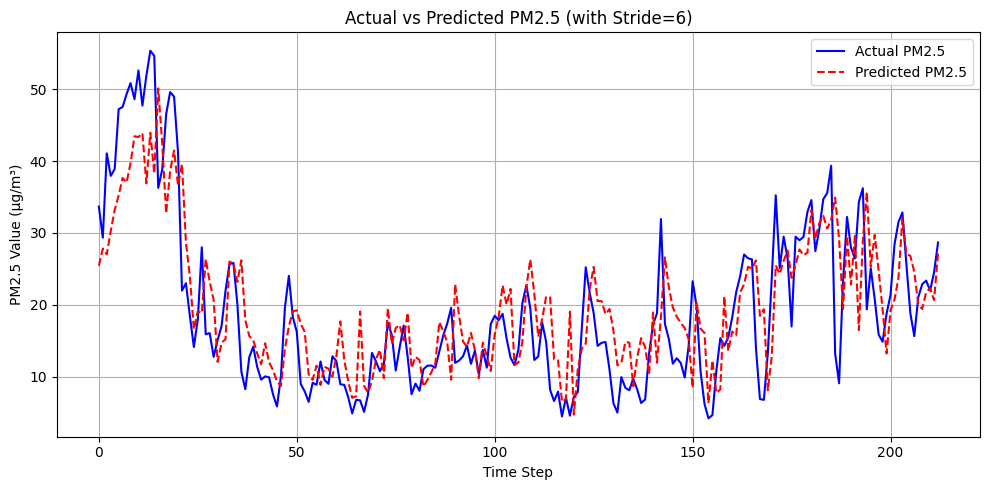

Test MSE: 47.3562, RMSE: 6.8816, MAE: 5.3321, R²: 0.6509


In [198]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# สร้างและ fit scaler กับข้อมูล pm_2_5
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(df_daily[['pm_2_5']].values)  # ใช้ข้อมูล pm_2_5 จาก DataFrame ดั้งเดิม

# ได้รับการพยากรณ์จากโมเดล
y_pred = model.predict(X_test)

# ตรวจสอบ shape
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# แปลงค่า y_test และ y_pred กลับเป็นค่า PM2.5 จจริง
y_test_original = scaler.inverse_transform(y_test).flatten()
y_pred_original = scaler.inverse_transform(y_pred).flatten()

# สร้าง time steps หรือใช้ timestamps (ถ้ามี) สำหรับแกน X
time_steps = np.arange(len(y_test_original))  # หรือใช้วันที่จริงจากข้อมูล

# ปรับปรุงการพล็อต
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(time_steps, y_test_original, label="Actual PM2.5", color="blue")
plt.plot(time_steps, y_pred_original, label="Predicted PM2.5", color="red", linestyle="dashed")
plt.xlabel("Time Step")
plt.ylabel("PM2.5 Value (µg/m³)")
plt.title("Actual vs Predicted PM2.5 (with Stride=6)")
plt.legend()
plt.grid(True)  # เพิ่มตารางเพื่อดูข้อมูลชัดเจนขึ้น
plt.tight_layout()  # ปรับขนาดกราฟให้เหมาะสม
plt.show()

# คำนวณและแสดง metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

test_mse = mean_squared_error(y_test_original, y_pred_original)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_original, y_pred_original)
test_r2 = r2_score(y_test_original, y_pred_original)

print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")

In [161]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# # ใช้ข้อมูล 7 วันล่าสุดจาก test set เป็น seed
# future_inputs = X_test[-1]  # ข้อมูล 7 วันล่าสุดจาก test set
# predictions = []

# # ทำนาย 7 วันข้างหน้า
# for _ in range(7):
#     next_day_pred = model.predict(future_inputs.reshape(1, future_inputs.shape[0], future_inputs.shape[1]))[0, 0]
#     predictions.append(next_day_pred)

#     # อัปเดต input sequence โดยเพิ่มค่าทำนายใหม่และลบค่าที่เก่าที่สุดออก
#     next_input = np.roll(future_inputs, shift=-1, axis=0)
#     next_input[-1, 2] = next_day_pred  # อัปเดตค่า pm_2.5 ที่ต้องทำนาย
#     future_inputs = next_input

# # แปลงค่ากลับเป็นสเกลเดิม (inverse transform)
# predictions_real = scaler.inverse_transform(np.column_stack([np.zeros((7, 3)), predictions]))[:, 3]

# # ใช้วันที่ปัจจุบันเป็นวันเริ่มต้น (วันนี้)
# current_date = pd.Timestamp.now()  # ดึงวันที่ปัจจุบัน
# predicted_dates = [current_date + pd.Timedelta(days=i) for i in range(1, 8)]

# # Plot กราฟ
# plt.figure(figsize=(10, 5))
# plt.plot(predicted_dates, predictions_real, marker='o', linestyle='-', label="Predicted PM2.5")
# plt.xlabel("Date")
# plt.ylabel("PM2.5 Level")
# plt.title("PM2.5 Prediction for Next 7 Days")
# plt.xticks(rotation=45)
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


การประเมินผลโมเดลเพิ่มเติม

In [162]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# import numpy as np

# # ทำนายค่า
# y_train_pred = model.predict(X_train)
# y_test_pred = model.predict(X_test)

# # คำนวณ Error Metrics
# train_mse = mean_squared_error(y_train, y_train_pred)
# test_mse = mean_squared_error(y_test, y_test_pred)

# train_rmse = np.sqrt(train_mse)
# test_rmse = np.sqrt(test_mse)

# train_mae = mean_absolute_error(y_train, y_train_pred)
# test_mae = mean_absolute_error(y_test, y_test_pred)

# train_r2 = r2_score(y_train, y_train_pred)
# test_r2 = r2_score(y_test, y_test_pred)

# print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, MAE: {train_mae:.4f}, R²: {train_r2:.4f}")
# print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, MAE: {test_mae:.4f}, R²: {test_r2:.4f}")


# Save models

In [197]:
# สมมติว่าโมเดลที่ฝึกแล้วชื่อ model
model.save('model_1.h5')  # บันทึกเป็นไฟล์ HDF5
print("Model saved as model.h5")

Model saved as model.h5


ค่าที่ลองปรับ


https://docs.google.com/spreadsheets/d/1yWkq7cC3KYUapJQHjMrWFCcLl91T-fFDsqyHJ6joJGQ/edit?usp=sharing

TODO
- หา data ที่มากกว่านี้และมี feature มากกว่านี้
- Hyperparameter tuning: ใช้เครื่องมืออย่าง GridSearchCV หรือ RandomizedSearchCV เพื่อหาค่า hyperparameters ที่ดีที่สุด
- ลองใช้ โมเดลอื่น เช่น GRU (Gated Recurrent Unit) ซึ่งบางครั้งสามารถให้ผลลัพธ์ที่ดีกว่า LSTM
- เพิ่มจำนวน epochs: ถ้าโมเดลยังไม่ได้ฝึกจนถึงจุดที่ดีที่สุด คุณอาจจะเพิ่มจำนวน epochs เพื่อให้โมเดลเรียนรู้มากขึ้น
- ลองใช้ LSTM หลายชั้น หรือ เพิ่มจำนวน neurons ใน LSTM layers
- ปรับ learning rate: คุณอาจจะลองปรับค่า learning rate ของ optimizer (เช่น ลดค่า learning rate เพื่อให้โมเดลเรียนรู้ได้ละเอียดขึ้น)


ต้องการดูค่าของ Forget Gate, Input Gate, และ Output Gate ในแต่ละขั้นตอนของโมเดล คุณสามารถดึง weights ของ LSTM layer ออกมาตรวจสอบได้